<a href="https://colab.research.google.com/github/aqz84167/AI-and-Security/blob/master/G-Code%20%E8%A8%BB%E8%A7%A3/Keras_Mnist_MLP_h1000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Import Library 導入庫

In [0]:
from keras.datasets import mnist        # 匯入 keras 的 MNIST 資料庫
from keras.utils import np_utils        # 匯入 Keras 的 Numpy 工具
import numpy as np                      # 匯入 Numpy
np.random.seed(10)                      # 匯入 mnist 模組後載入資料集

####load data 加載數據

In [0]:
(x_train_image,y_train_label),(x_test_image,y_test_label)= mnist.load_data()      # 讀入Mnist資料

####訓練集的第一個樣本圖片 (2 維陣列)。

In [14]:
 x_train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

####可見圖片樣本是以一個 28 * 28 的數字陣列表示畫素明亮度, 0 為亮點, 255 為暗點, 0~255 間為灰階, 第一其對應之標籤為5

In [15]:
y_train_label[0]

5

####用 Numpy 的 reshape() 將訓練與測試樣本圖片的二維陣列都轉成 1 維向量, 其中訓練樣本有 6 萬個, 測試樣本有 1 萬個. 接著是呼叫 astype() 將數值型態轉成32-bit 浮點數, 方便後面正規化

In [0]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')       #轉成 1 維向量
x_Test = x_test_image.reshape(10000, 784).astype('float32')        #轉成 1 維向量

In [20]:
x_Train[0]   #訓練集的第一個樣本圖片 (轉成 1*784 的一維向量)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

#### 可見圖片樣本已轉成 1*784 的一維向量了. 為了提高訓練模型之精確度, 必須將此一維向量正規化 (normalization), 正規化可以用值域的最大值, 或者整體平均值做分母去除, 此處用除以最大值的方式, 這樣原來 0~255 的像素值就變成 0~1 之間了

In [21]:
x_Train_normalize = x_Train / 255        #訓練樣本除以最大值正規化
x_Test_normalize = x_Test / 255          #測試樣本除以最大值正規化
x_Train_normalize[0]                     #訓練樣本的第一個正規化圖片

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

####One-hot encoding 最常用來表示類別型變數 (Categorical variables), 又稱為虛擬變數. 在 Numpy 中 One-hot encoding 是透過 to_categorical() 函數達成

In [22]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)   #訓練樣本之標籤編碼
y_Test_OneHot = np_utils.to_categorical(y_test_label)     #測試樣本之標籤編碼
y_train_label[0]                                          #訓練樣本的第一個標籤為 5 (原始標籤)


5

#### 僅第五個位元為 1, 其餘為 0

In [23]:
y_Train_OneHot[0]       #訓練樣本的第一個標籤編碼後 (One-hot)

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

####建立模型
按照上面的 MLP 多重感知器結構, 各層神經元是一層一層前後堆疊起來, 所以要從 keras.models 匯入 Sequential 模組, 並從 keras.layers 匯入 Dense 模組 (緊密連接),先呼叫 Sequenctial() 建立線性堆疊模型

In [24]:
from keras.models import Sequential                        #匯入線性堆疊模型之模組
from keras.layers import Dense                             #匯入緊密連接模組
model = Sequential()                                       #建立線性堆疊模型
model.add(Dense(units=1000,                                #建立輸入層至隱藏層連接
                input_dim=784,                             #輸入神經元數目=784
                kernel_initializer='normal',               #以常態分佈亂數初始化參數
                activation='relu'))                        #使用 ReLu 激活函數
model.add(Dense(units=10,                                  #建立隱藏層至輸出層連接
                kernel_initializer='normal',               #以常態分佈亂數初始化參數
                activation='softmax'))                     #使用 SoftMax 激活函數
print(model.summary())                                     #顯示模型的摘要

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


####訓練模型

In [0]:
model.compile(loss='categorical_crossentropy',             #設定損失函數
              optimizer='adam', metrics=['accuracy'])      #設定最佳化方法、設定評估模型之方式

####其中前兩個參數分別傳入正規化的訓練樣本數字圖片向量與其對應之 One-hot 編碼標籤. validation_split (0~1) 是設定要從訓練資料中分出多少比率做驗證, 0.2 表示從 60000 筆訓練樣本中分割出 20% 即 60000x0.2=12000 筆作驗證, 而其餘 80% 即 60000*0.8=48000 做訓練. epochs 用來設定整個訓練要跑幾輪, 而 batch_size 則是每個批次要取多少筆資料來訓練, 亦即 fit() 並非將 60000 筆訓練資料一次跑完, 而是一次跑 200 筆.

In [26]:
train_history=model.fit(x=x_Train_normalize,                          #正規化的訓練樣本圖片
                        y=y_Train_OneHot,validation_split=0.2,        #One-hot 編碼、分出 20% 做驗證
                        epochs=10, batch_size=200,verbose=2)          #設定訓練週期 (輪)、每批次訓練筆數、=2 顯示訓練過程

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 7s - loss: 0.2945 - acc: 0.9151 - val_loss: 0.1527 - val_acc: 0.9564
Epoch 2/10
 - 6s - loss: 0.1180 - acc: 0.9659 - val_loss: 0.1076 - val_acc: 0.9675
Epoch 3/10
 - 7s - loss: 0.0760 - acc: 0.9783 - val_loss: 0.0929 - val_acc: 0.9723
Epoch 4/10
 - 7s - loss: 0.0517 - acc: 0.9849 - val_loss: 0.0869 - val_acc: 0.9738
Epoch 5/10
 - 6s - loss: 0.0358 - acc: 0.9905 - val_loss: 0.0747 - val_acc: 0.9764
Epoch 6/10
 - 6s - loss: 0.0255 - acc: 0.9936 - val_loss: 0.0734 - val_acc: 0.9776
Epoch 7/10
 - 6s - loss: 0.0185 - acc: 0.9959 - val_loss: 0.0720 - val_acc: 0.9789
Epoch 8/10
 - 6s - loss: 0.0133 - acc: 0.9971 - val_loss: 0.0706 - val_acc: 0.9786
Epoch 9/10
 - 7s - loss: 0.0088 - acc: 0.9988 - val_loss: 0.0708 - val_acc: 0.9796
Epoch 10/10
 - 7s - loss: 0.0064 - acc: 0.9991 - val_loss: 0.0717 - val_acc: 0.9799


####以圖形顯示訓練過程
其中 loss 與 acc 分別為使用 80% 訓練樣本之損失與精確率; 而 val_loss 與 val_acc 分別為使用 20% 訓練樣本驗證之損失與精確率, 可見經過十輪訓練後兩部分的損失都越來越小; 而精確率則越來越高. 這十輪訓練的結果會以 dict 型態儲存在 train_history 變數的 history 屬性中, 可用 "loss", "acc", "val_loss", 與 "val_acc" 等 key 存取

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

####結果
不論是藍色的 48000 筆訓練樣本 (acc) 或綠色的 12000 筆的驗證樣本 val_acc), 其準確度會隨著訓練輪次增加而增加; 而下圖的誤差子圖則顯示誤差 (loss 與 val_loss) 越來越小. 不過, 驗證樣本因為沒有參加訓練, 故其準確度在第二輪以後較訓練樣本來得低.

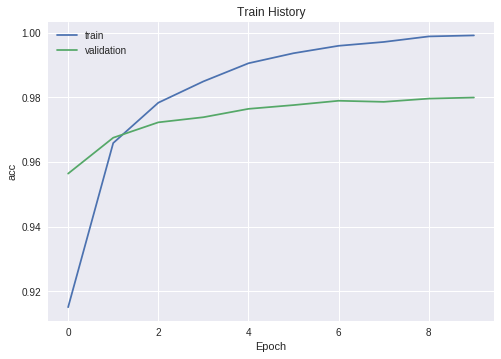

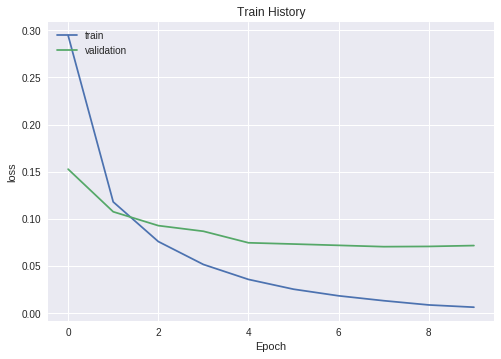

In [28]:
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

####評估模型準確率

In [51]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot) #評估準確率
print()
print('accuracy=',scores[1])                             #顯示準確率

10000/10000 [==============================] - 1s 101us/step

accuracy= 0.9779


####進行預測

In [53]:
prediction=model.predict_classes(x_Test)     #預測測試樣本
prediction                                   #顯示預測結果

array([7, 2, 1, ..., 4, 5, 6])

In [0]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()                                             #取得 pyplot 物件參考
    fig.set_size_inches(12, 14)                                 #設定畫布大小為 12 吋*14吋
    if num>25: num=25                                           #限制最多顯示 25 個子圖
    for i in range(0, num):                                     #依序顯示 num 個子圖
        ax=plt.subplot(5,5, 1+i)                                #建立 5*5 個子圖中的第 i+1 個
        ax.imshow(images[idx], cmap='binary')                   #顯示子圖

        ax.set_title("label=" +str(labels[idx])+                #有預測值就加入標題中
                     ",predict="+str(prediction[idx])           #設定標題
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])                     #不顯示 x 軸刻度，不顯示 y 軸刻度
        idx+=1                                                  #樣本序號增量 1
    plt.show()                                                  #繪製圖形

####可見在 label 後面都有 predict 值了, 而且這 25 張全部準確. 第一個辨識錯誤的樣本出現在測試樣本索引為 340 的圖片, 執行下列指令會顯示自索引 340 起的 10 張測試樣本與其預測結果
左上角第一個圖片就是索引 340 的測試樣本, 寫的像 3 又像 5 (實際上是 5), MLP 根據訓練模型預測此為 3, 結果答錯了.


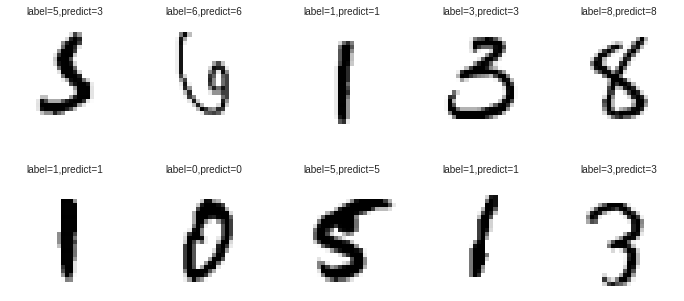

In [55]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=340)